In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [6]:
df.sample(10)

job_title_short                                          job_title  \
716973       Data Analyst  Data Governance Analyst II - Frameworks, Stand...   
200363       Data Analyst                Data Encounter Analyst - Now Hiring   
348238      Data Engineer        Data analytics ingeniero control de gestion   
254010       Data Analyst                    Senior Methods and Data Analyst   
623213     Data Scientist                             Data Scientist(Remote)   
164708      Data Engineer                                      Data Engineer   
610587      Data Engineer           Quality Assurance Engineer- ETL/Big Data   
123977       Data Analyst                             Data Analytics Analyst   
68232   Software Engineer                                    Product Analyst   
33682      Data Scientist                             Data Scientist (m/w/d)   

                    job_location                         job_via  \
716973             St. Louis, MO                      via Indeed   
200363            California, MO                    via Snagajob   
348238           Santiago, Chile                    via Sercanto   
254010  Pune, Maharashtra, India  via SmartRecruiters Job Search   
623213                 Miami, FL                       via BeBee   
164708  Nederhemert, Netherlands                   via Magnet.me   
610587           Spartanburg, SC                    via LinkedIn   
123977               Portage, IN                       via BeBee   
68232                   Anywhere                    via LinkedIn   
33682                    Germany                    via LinkedIn   

              job_schedule_type  job_work_from_home          search_location  \
716973                Full-time               False  Illinois, United States   
200363  Full-time and Part-time               False  Illinois, United States   
348238                Full-time               False                    Chile   
254010                Full-time               False                    India   
623213                Full-time               False   Florida, United States   
164708  Full-time and Part-time               False              Netherlands   
610587                Full-time               False  New York, United States   
123977                Full-time               False  Illinois, United States   
68232                 Full-time                True                Argentina   
33682                 Full-time               False                  Germany   

           job_posted_date  job_no_degree_mention  job_health_insurance  \
716973 2023-08-21 02:03:32                  False                  True   
200363 2023-12-08 15:01:42                  False                  True   
348238 2023-10-16 23:39:26                  False                 False   
254010 2023-06-01 07:40:03                  False                 False   
623213 2023-10-08 12:04:26                  False                 False   
164708 2023-10-21 15:59:13                  False                 False   
610587 2023-01-28 12:07:09                  False                 False   
123977 2023-09-16 08:01:27                   True                 False   
68232  2023-10-26 06:47:09                  False                 False   
33682  2023-08-10 13:41:49                  False                 False   

          job_country salary_rate  salary_year_avg  salary_hour_avg  \
716973  United States        None              NaN              NaN   
200363  United States        hour              NaN             28.5   
348238          Chile        None              NaN              NaN   
254010          India        None              NaN              NaN   
623213  United States        None              NaN              NaN   
164708    Netherlands        None              NaN              NaN   
610587  United States        None              NaN              NaN   
123977  United States        None              NaN              NaN   
68232       Argentina        None 

In [7]:
data = pd.DataFrame({
    "Region": ["North", "North", "South", "South", "East", "East", "West", "West"],
    "Product": ["A", "B", "A", "B", "A", "B", "A", "B"],
    "Quarter": ["Q1", "Q1", "Q1", "Q2", "Q2", "Q1", "Q2", "Q1"],
    "Sales": [100, 150, 200, 130, 170, 110, 140, 160],
    "Profit": [20, 30, 40, 25, 35, 22, 28, 32]
})

print(data)

  Region Product Quarter  Sales  Profit
0  North       A      Q1    100      20
1  North       B      Q1    150      30
2  South       A      Q1    200      40
3  South       B      Q2    130      25
4   East       A      Q2    170      35
5   East       B      Q1    110      22
6   West       A      Q2    140      28
7   West       B      Q1    160      32


In [10]:
pivot = pd.pivot_table(data,index='Region',columns='Product',values='Sales',aggfunc='sum')

In [11]:
pivot

Product    A    B
Region           
East     170  110
North    100  150
South    200  130
West     140  160

In [12]:
pivot['Sum'] = pivot['A']+pivot['B']

In [15]:
pivot.sort_values(by='Sum',ascending=False)

Product    A    B  Sum
Region                
South    200  130  330
West     140  160  300
East     170  110  280
North    100  150  250

In [16]:
data

Region Product Quarter  Sales  Profit
0  North       A      Q1    100      20
1  North       B      Q1    150      30
2  South       A      Q1    200      40
3  South       B      Q2    130      25
4   East       A      Q2    170      35
5   East       B      Q1    110      22
6   West       A      Q2    140      28
7   West       B      Q1    160      32

In [20]:
pd.pivot_table(data,index='Quarter',columns='Product',values=['Sales','Profit'],aggfunc={'Sales':'mean','Profit':'sum'})

Profit      Sales       
Product      A   B      A      B
Quarter                         
Q1          60  84  150.0  140.0
Q2          63  25  155.0  130.0

In [21]:
data

Region Product Quarter  Sales  Profit
0  North       A      Q1    100      20
1  North       B      Q1    150      30
2  South       A      Q1    200      40
3  South       B      Q2    130      25
4   East       A      Q2    170      35
5   East       B      Q1    110      22
6   West       A      Q2    140      28
7   West       B      Q1    160      32

In [22]:
df = pd.DataFrame({
    'Category_A': ['X', 'X', 'Y', 'Y', 'X'],
    'Category_B': ['P', 'Q', 'P', 'Q', 'P'],
    'Value': [10, 15, 20, 25, 30]
})

# Create a pivot table with margins
pivot_with_margins = pd.pivot_table(
    df,
    values='Value',
    index='Category_A',
    columns='Category_B',
    aggfunc='sum',
    margins=True
)

print(pivot_with_margins)

Category_B   P   Q  All
Category_A             
X           40  15   55
Y           20  25   45
All         60  40  100


In [26]:
pd.pivot_table(
    data,
    index='Region',
    columns='Product',
    values='Sales',
    aggfunc='sum',
    margins=True,
    margins_name='Total'
    )

Product    A    B  Total
Region                  
East     170  110    280
North    100  150    250
South    200  130    330
West     140  160    300
Total    610  550   1160

In [27]:
pivot = pd.pivot_table(data,
                       index='Region',
                       columns='Product',
                       values='Sales',
                       aggfunc='sum',
                       fill_value=0
                       )

In [28]:
pd.pivot_table(
    data,
    index=['Region','Quarter'],
    columns='Product',
    values='Sales',
    aggfunc='sum',
    fill_value=0
)

Product           A    B
Region Quarter          
East   Q1         0  110
       Q2       170    0
North  Q1       100  150
South  Q1       200    0
       Q2         0  130
West   Q1         0  160
       Q2       140    0

In [29]:
df

Category_A Category_B  Value
0          X          P     10
1          X          Q     15
2          Y          P     20
3          Y          Q     25
4          X          P     30

In [30]:
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [31]:
df

job_title_short  \
0       Senior Data Engineer   
1               Data Analyst   
2              Data Engineer   
3              Data Engineer   
4              Data Engineer   
...                      ...   
785736     Software Engineer   
785737          Data Analyst   
785738      Business Analyst   
785739         Data Engineer   
785740     Software Engineer   

                                                job_title  \
0       Senior Clinical Data Engineer / Principal Clin...   
1                                            Data Analyst   
2       Data Engineer/Scientist/Analyst, Mid or Senior...   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4                                  Data Engineer- Sr Jobs   
...                                                   ...   
785736                                    DevOps Engineer   
785737                                   CRM Data Analyst   
785738                     Commercial Analyst - Start Now   
785739  Principal Associate, Data Engineer (Remote-Eli...   
785740                                 AWS System Analyst   

                               job_location                    job_via  \
0                             Watertown, CT            via Work Nearby   
1              Guadalajara, Jalisco, Mexico           via BeBee México   
2                           Berlin, Germany               via LinkedIn   
3                           San Antonio, TX          via Diversity.com   
4                            Washington, DC         via Clearance Jobs   
...                                     ...                        ...   
785736                            Singapura        melalui Trabajo.org   
785737                   Bad Rodach, Jerman  melalui BeBee Deutschland   
785738                             Malaysia           melalui Ricebowl   
785739  Newark, New Jersey, Amerika Serikat        melalui Recruit.net   
785740                                India             melalui Trigyn   

       job_schedule_type  job_work_from_home       search_location  \
0              Full-time               False  Texas, United States   
1              Full-time               False                Mexico   
2              Full-time               False               Germany   
3              Full-time               False  Texas, United States   
4              Full-time               False                 Sudan   
...                  ...                 ...                   ...   
785736   Pekerjaan tetap               False             Singapore   
785737   Pekerjaan tetap               False               Germany   
785738   Pekerjaan tetap               False              Malaysia   
785739   Pekerjaan tetap               False                 Sudan   
785740   Pekerjaan tetap               False                 India   

           job_posted_date  job_no_degree_mention  job_health_insurance  \
0      2023-06-16 13:44:15                  False                 False   
1      2023-01-14 13:18:07                  False                 False   
2      2023-10-10 13:14:55                  False                 False   
3      2023-07-04 13:01:41                   True                 False   
4      2023-08-07 14:29:36                  False                 False   
...                    ...                    ...                   ...   
785736 2023-03-13 06:16:16                  False                 False   
785737 2023-03-12 06:18:18                  False                 False   
785738 2023-03-12 06:32:36                  False                 False   
785739 2023-03-12 06:32:15                  False                 False   
785740 2023-03-13 06:16:31                  False                 False   

          job_country salary_rate  salary_year_avg  salary_hour_avg  \
0       United States        None              NaN              NaN   
1              Mexico        None              NaN              NaN   
2             Germany        None              NaN 

In [32]:
pd.pivot_table(df,index='job_country',columns='job_title_short',values='salary_year_avg',aggfunc='median')

job_title_short  Business Analyst  Cloud Engineer  Data Analyst  \
job_country                                                       
Albania                       NaN             NaN      49950.00   
Algeria                       NaN             NaN      44100.00   
Argentina                 71100.0        197500.0      92771.75   
Armenia                       NaN             NaN     100500.00   
Australia                 70000.0        110000.0     109500.00   
...                           ...             ...           ...   
Uruguay                       NaN             NaN     100500.00   
Uzbekistan                    NaN             NaN           NaN   
Vietnam                   79200.0             NaN      75550.00   
Zambia                        NaN             NaN           NaN   
Zimbabwe                      NaN             NaN      63000.00   

job_title_short  Data Engineer  Data Scientist  Machine Learning Engineer  \
job_country                                                                 
Albania                    NaN        69981.25                        NaN   
Algeria                45000.0             NaN                        NaN   
Argentina              96773.0        71000.00                   101029.0   
Armenia                48750.0             NaN                    87021.0   
Australia             106712.5       139216.00                   101029.0   
...                        ...             ...                        ...   
Uruguay                    NaN             NaN                    50000.0   
Uzbekistan                 NaN        30750.00                        NaN   
Vietnam                96773.0        70000.00                    57600.0   
Zambia                     NaN        90670.00                        NaN   
Zimbabwe                   NaN        69085.00                        NaN   

job_title_short  Senior Data Analyst  Senior Data Engineer  \
job_country                                                  
Albania                          NaN                   NaN   
Algeria                          NaN                   NaN   
Argentina                        NaN              147500.0   
Armenia                          NaN                   NaN   
Australia                    50640.0              147500.0   
...                              ...                   ...   
Uruguay                          NaN                   NaN   
Uzbekistan                       NaN                   NaN   
Vietnam                     105837.5              147500.0   
Zambia                           NaN                   NaN   
Zimbabwe                         NaN                   NaN   

job_title_short  Senior Data Scientist  Software Engineer  
job_country                                                
Albania                       157500.0                NaN  
Algeria                            NaN                NaN  
Argentina                          NaN           174500.0  
Armenia                            NaN                NaN  
Australia                     157500.0           118350.0  
...                                ...                ...  
Uruguay                        57500.0                NaN  
Uzbekistan                         NaN                NaN  
Vietnam                        79200.0            53600.0  
Zambia                             NaN                NaN  
Zimbabwe                           NaN                NaN  

[108 rows x 10 columns]

In [41]:
top_countries = df['job_country'].value_counts().head(6).index

In [42]:
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [43]:
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

In [44]:
df_job_country_salary

job_title_short  Business Analyst  Cloud Engineer  Data Analyst  \
job_country                                                       
Albania                       NaN             NaN      49950.00   
Algeria                       NaN             NaN      44100.00   
Argentina                 71100.0        197500.0      92771.75   
Armenia                       NaN             NaN     100500.00   
Australia                 70000.0        110000.0     109500.00   
...                           ...             ...           ...   
Uruguay                       NaN             NaN     100500.00   
Uzbekistan                    NaN             NaN           NaN   
Vietnam                   79200.0             NaN      75550.00   
Zambia                        NaN             NaN           NaN   
Zimbabwe                      NaN             NaN      63000.00   

job_title_short  Data Engineer  Data Scientist  Machine Learning Engineer  \
job_country                                                                 
Albania                    NaN        69981.25                        NaN   
Algeria                45000.0             NaN                        NaN   
Argentina              96773.0        71000.00                   101029.0   
Armenia                48750.0             NaN                    87021.0   
Australia             106712.5       139216.00                   101029.0   
...                        ...             ...                        ...   
Uruguay                    NaN             NaN                    50000.0   
Uzbekistan                 NaN        30750.00                        NaN   
Vietnam                96773.0        70000.00                    57600.0   
Zambia                     NaN        90670.00                        NaN   
Zimbabwe                   NaN        69085.00                        NaN   

job_title_short  Senior Data Analyst  Senior Data Engineer  \
job_country                                                  
Albania                          NaN                   NaN   
Algeria                          NaN                   NaN   
Argentina                        NaN              147500.0   
Armenia                          NaN                   NaN   
Australia                    50640.0              147500.0   
...                              ...                   ...   
Uruguay                          NaN                   NaN   
Uzbekistan                       NaN                   NaN   
Vietnam                     105837.5              147500.0   
Zambia                           NaN                   NaN   
Zimbabwe                         NaN                   NaN   

job_title_short  Senior Data Scientist  Software Engineer  
job_country                                                
Albania                       157500.0                NaN  
Algeria                            NaN                NaN  
Argentina                          NaN           174500.0  
Armenia                            NaN                NaN  
Australia                     157500.0           118350.0  
...                                ...                ...  
Uruguay                        57500.0                NaN  
Uzbekistan                         NaN                NaN  
Vietnam                        79200.0            53600.0  
Zambia                             NaN                NaN  
Zimbabwe                           NaN                NaN  

[108 rows x 10 columns]

In [45]:
df_job_country_salary =df_job_country_salary.loc[top_countries]

In [46]:
df_job_country_salary

job_title_short  Business Analyst  Cloud Engineer  Data Analyst  \
job_country                                                       
United States             90000.0        116100.0       90000.0   
India                     64800.0             NaN      100500.0   
United Kingdom            56700.0             NaN       87750.0   
France                    89100.0        105968.0       69175.0   
Germany                   89100.0         89100.0      103750.0   
Spain                     86400.0         89100.0       91977.0   

job_title_short  Data Engineer  Data Scientist  Machine Learning Engineer  \
job_country                                                                 
United States         125000.0        130000.0                   150000.0   
India                 147500.0        114008.0                    79200.0   
United Kingdom        110000.0        105300.0                   149653.0   
France                 98301.5         88128.0                    80850.0   
Germany               147500.0        131560.0                    89100.0   
Spain                 133000.0         88128.0                   101029.0   

job_title_short  Senior Data Analyst  Senior Data Engineer  \
job_country                                                  
United States               110000.0              150000.0   
India                       111175.0              147500.0   
United Kingdom              111175.0              147500.0   
France                      111175.0              147500.0   
Germany                     111175.0              147500.0   
Spain                       111175.0              147500.0   

job_title_short  Senior Data Scientist  Software Engineer  
job_country                                                
United States                 155000.0           130000.0  
India                         149653.0            79200.0  
United Kingdom                157500.0            89100.0  
France                        157500.0           142500.0  
Germany                       157500.0            84975.0  
Spain                         157500.0            77050.0

In [47]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]

In [48]:
df_job_country_salary

job_title_short  Data Analyst  Data Engineer  Data Scientist
job_country                                                 
United States         90000.0       125000.0        130000.0
India                100500.0       147500.0        114008.0
United Kingdom        87750.0       110000.0        105300.0
France                69175.0        98301.5         88128.0
Germany              103750.0       147500.0        131560.0
Spain                 91977.0       133000.0         88128.0

<Axes: xlabel='job_country'>

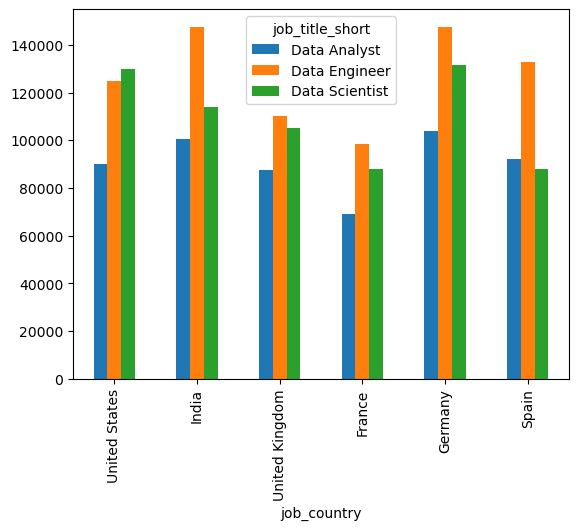

In [49]:
df_job_country_salary.plot(kind='bar')